# Exploratory Data Analysis

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for US Data Analyst Roles

In [7]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_plot = df_DA_US.job_location.value_counts().head(10).to_frame()


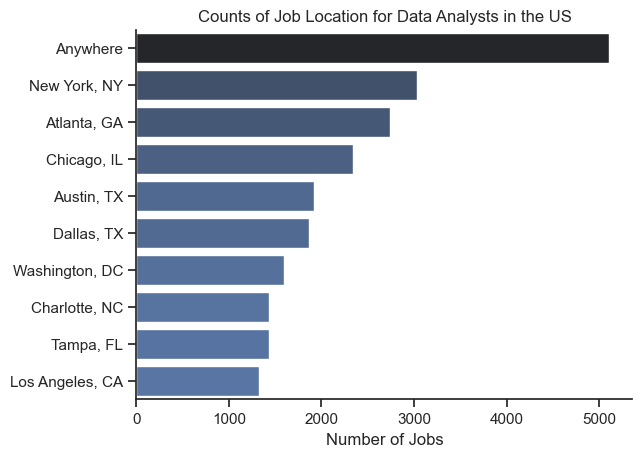

In [15]:

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Location for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

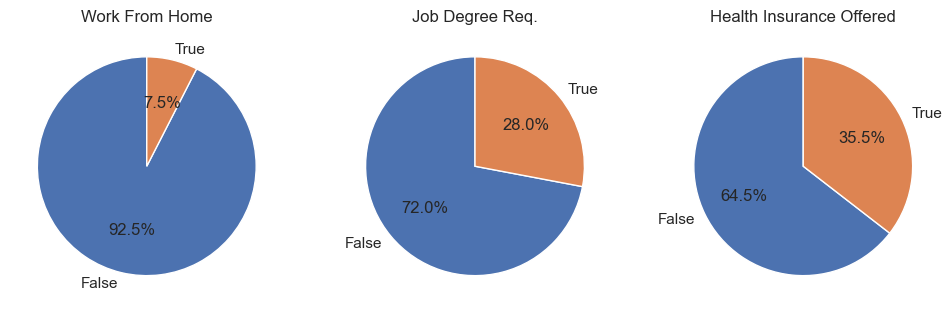

In [16]:

dict_column = {
    "job_work_from_home": "Work From Home",
    "job_no_degree_mention": "Job Degree Req.",
    "job_health_insurance": "Health Insurance Offered",
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(
        df_DA_US[column].value_counts(),
        startangle=90,
        autopct="%1.1f%%",
        labels=["False", "True"],
    )
    ax[i].set_title(title)

plt.show()

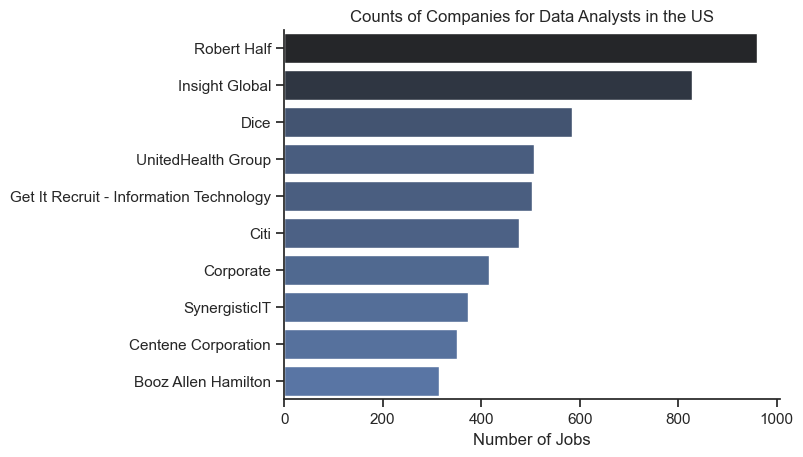

In [19]:
df_DA_US = df[
    (df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")
]
df_plot = df_DA_US.company_name.value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(
    data=df_plot,
    x="count",
    y="company_name",
    hue="count",
    palette="dark:b_r",
    legend=False,
)
sns.despine()
plt.title("Counts of Companies for Data Analysts in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()